# Machine Learning - Credit Card Default

Kaggle project
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset


## Pipeline
1. Extract Data
2. Mine Data (Data Exploration)
3. Transform Data
4. Split Data (Test & Train)
5. Train Model
6. Test Model
7. Repeat


## 0. Setup Notebook Enviornment

In [1]:
%pylab inline
import pandas
import seaborn
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Setup options for display
pandas.set_option('display.max_rows', 500)
pandas.set_option('display.max_columns', 500)
pandas.set_option('display.max_colwidth', 500)
pandas.set_option('display.width', 1000)

## 1. Extract Data

In [4]:
file = r'C:\Users\jhanl\Documents\Python\Venvs\Sandbox\projects\MachineLearning'
data_file = 'UCI_Credit_Card.csv'
data_filepath = os.path.join(file, data_file)

data_defs_file = 'CreditCardDefault_DataDefinitions.csv'
data_defs_filepath = os.path.join(file, data_defs_file)
data_defs_df = pandas.read_csv(data_defs_filepath)

In [5]:
data_defs_df

,Name,Definition
0,ID,ID of each client
1,LIMIT_BAL,Amount of given credit in NT dollars (includes individual and family/supplementary credit
2,SEX,"Gender (1=male, 2=female)"
3,EDUCATION,"(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)"
4,MARRIAGE,"Marital status (1=married, 2=single, 3=others)"
5,AGE,Age in years
6,PAY_0,"Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)"
7,PAY_2,"Repayment status in August, 2005 (scale same as above)"
8,PAY_3,"Repayment status in July, 2005 (scale same as above)"
9,PAY_4,"Repayment status in June, 2005 (scale same as above)"


In [8]:
data_df = pandas.read_csv(data_filepath)
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## 2. Mine Data

In [9]:
## Decribe data - Let's start to figure out what we're dealing with
data_df.describe() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [14]:
data_df['default.payment.next.month']

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
30       0
31       1
32       0
33       0
34       0
35       0
36       0
37       0
38       1
39       0
40       0
41       0
42       0
43       0
44       0
45       1
46       1
47       1
48       0
49       0
50       1
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       1
61       0
62       1
63       1
64       0
65       1
66       1
67       0
68       0
69       0
70       0
71       1
72       0
73       0
74       0
75       0
76       0
77       0
78       1
79       1
80       0
81       0
82       1
83       0
84       0
85       0
86       1
87       0
88       0
89       0
90       1

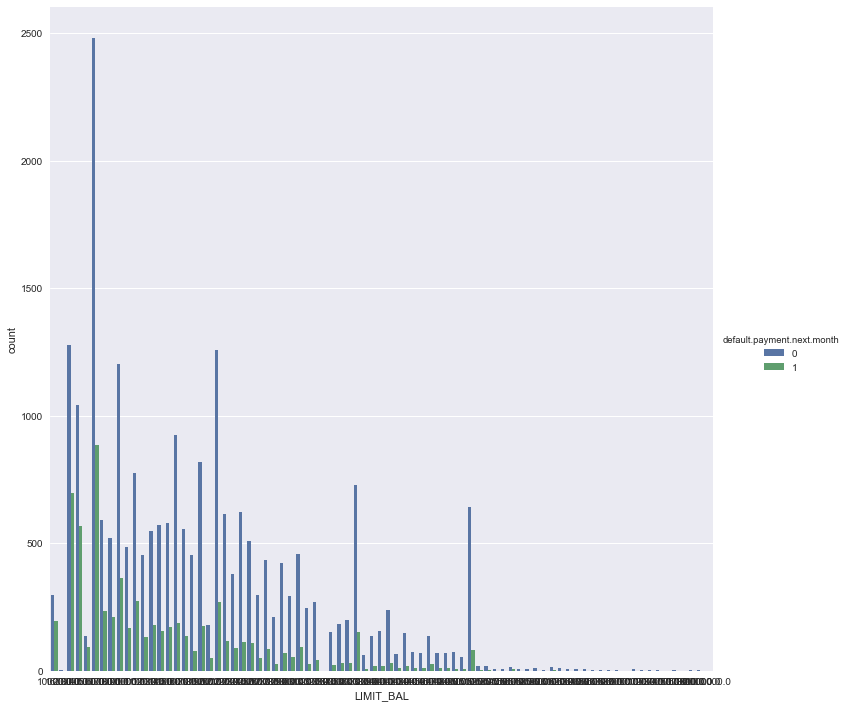

In [12]:
# Let's check out th
dependent_var = 'LIMIT_BAL'
#seaborn.distplot(cc_df['SEX'])
seaborn.factorplot(
    data = data_df
    ,x = dependent_var 
    ,hue = 'default.payment.next.month'
    ,kind = 'count'
    ,size = 10
)
#cc_df.describe()
#cc_df.corr()

## 3. Transform Data

## 4. Split Data

## 5. Train Model

## 6. Test Model